In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from beamprop_pkg.beamprop.grids import Grid2D
from beamprop_pkg.beamprop.absorbers import supergaussian_mask_2d, absorbing_field_1d

In [3]:
g = Grid2D(x_span=1.024e-3, z_span=3e-3, nx=512, nz=300)
X, Z, dx, dz = g.mesh()
M = supergaussian_mask_2d(X, Z, g.x_span, g.z_span, width_frac=0.30, order=6)

In [4]:
import numpy as np

test1 = np.array(range(5))
test2 = np.array(range(5, 10))

np.concatenate([test1, test2])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
test = absorbing_field_1d(1024, 50, 0)
print(len(test))

1024


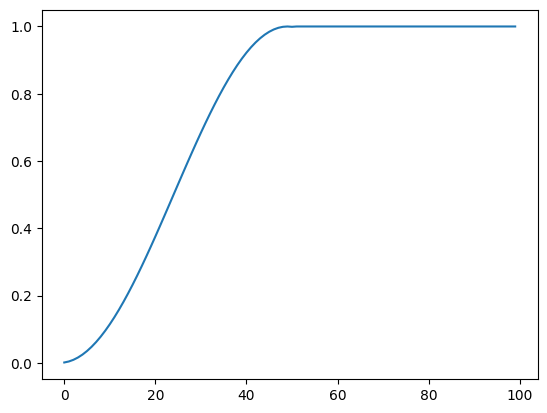

In [12]:
import matplotlib.pyplot as plt

plt.plot(test[:100])
plt.show()